In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
fire = pd.read_csv(r"forestfires.csv")

In [3]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [4]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# droping the columns

df_forest = fire.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr',
                                      'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar',
                                      'monthmay', 'monthnov','monthoct','monthsep'], axis = 1)
df_forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [9]:
df_forest.value_counts

<bound method DataFrame.value_counts of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3  

<ipython-input-10-456313295590>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_forest.corr(), annot=True, cmap="inferno")


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

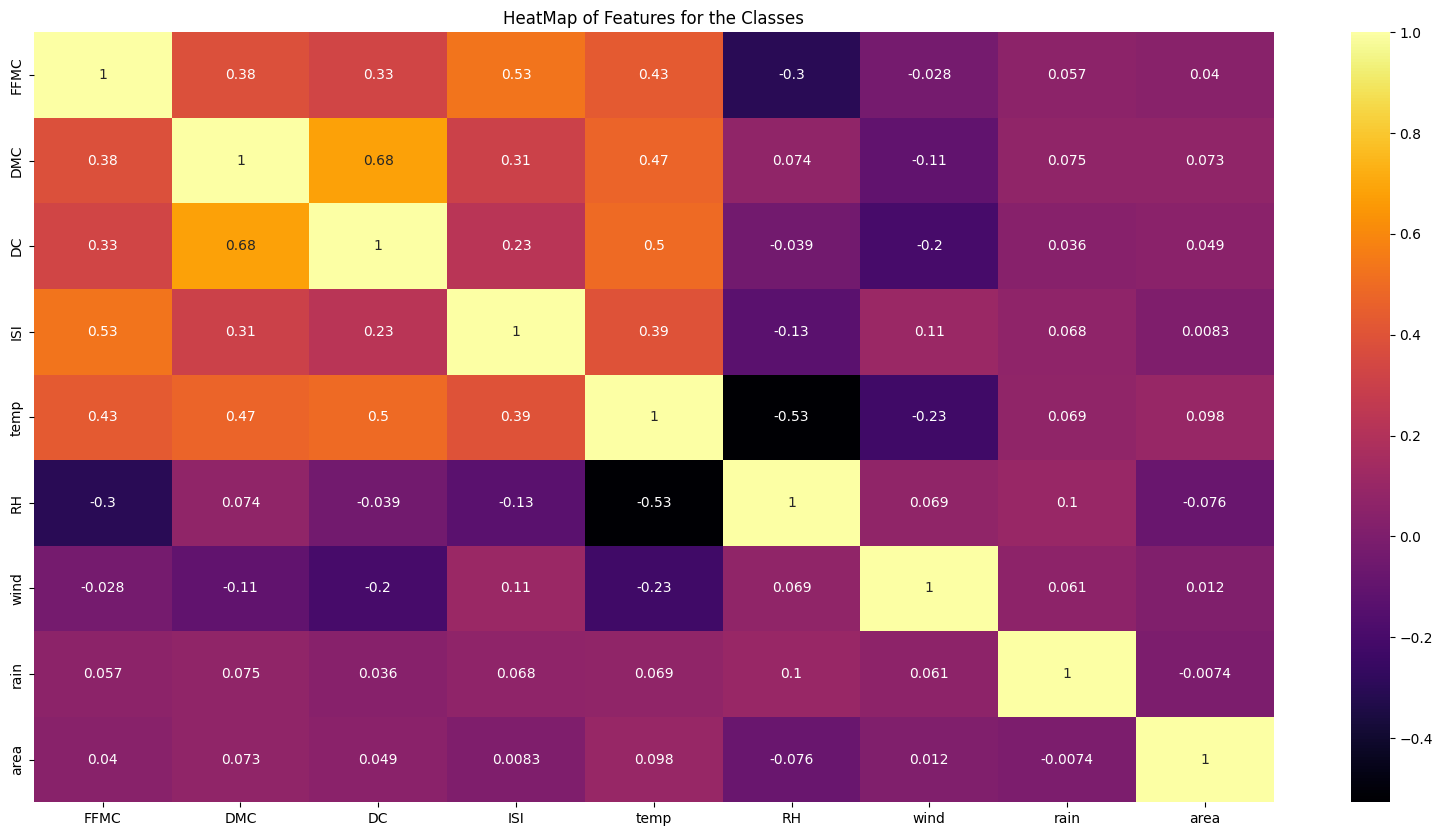

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.heatmap(df_forest.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

<Axes: xlabel='rain', ylabel='wind'>

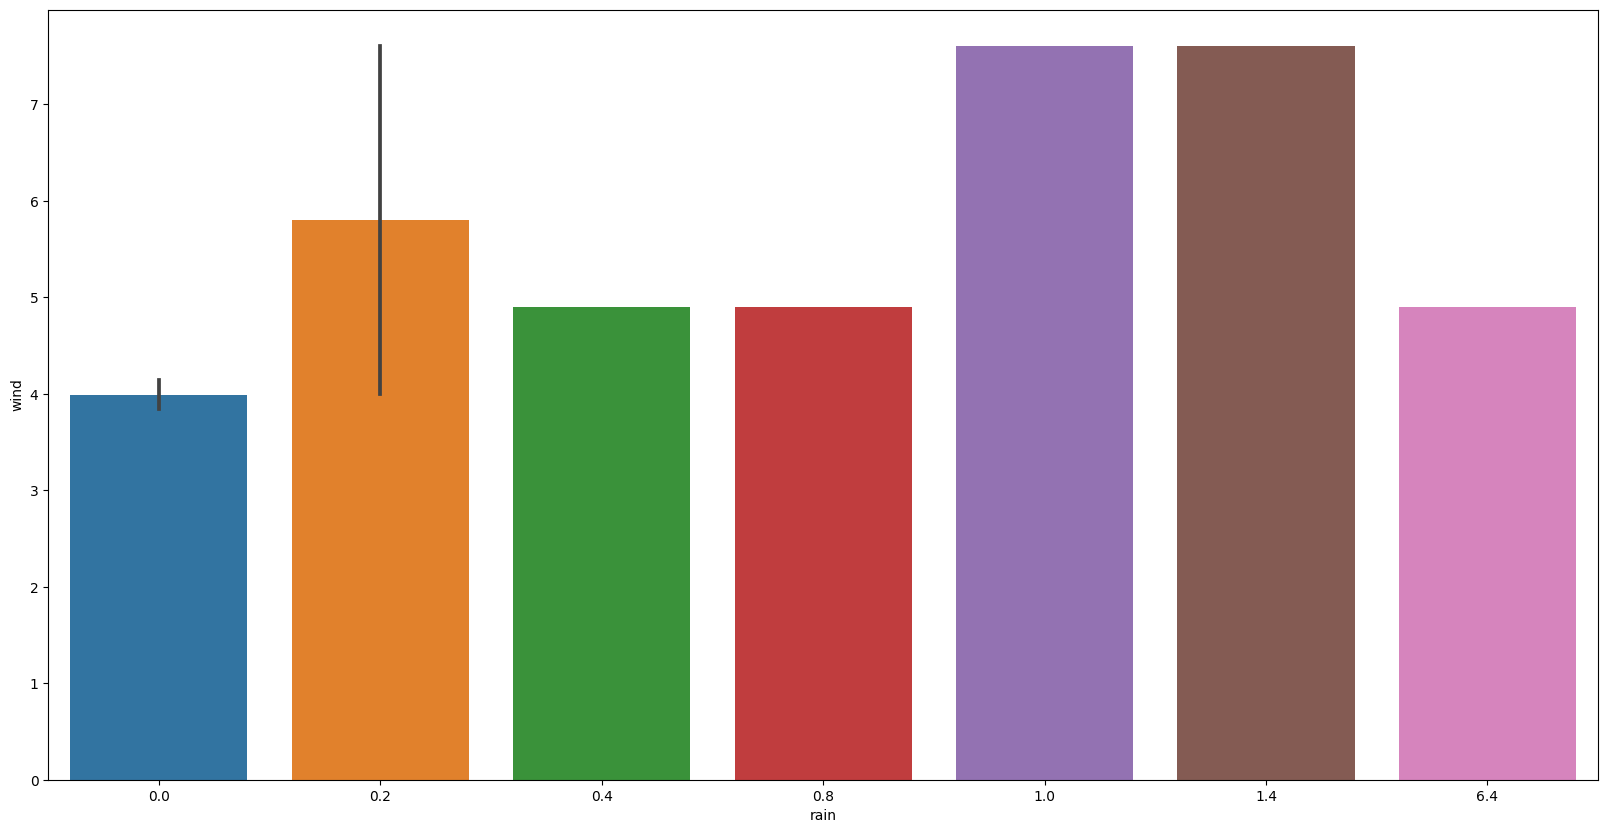

In [11]:
sns.barplot(data=df_forest, y='wind', x='rain')

<Axes: xlabel='day', ylabel='temp'>

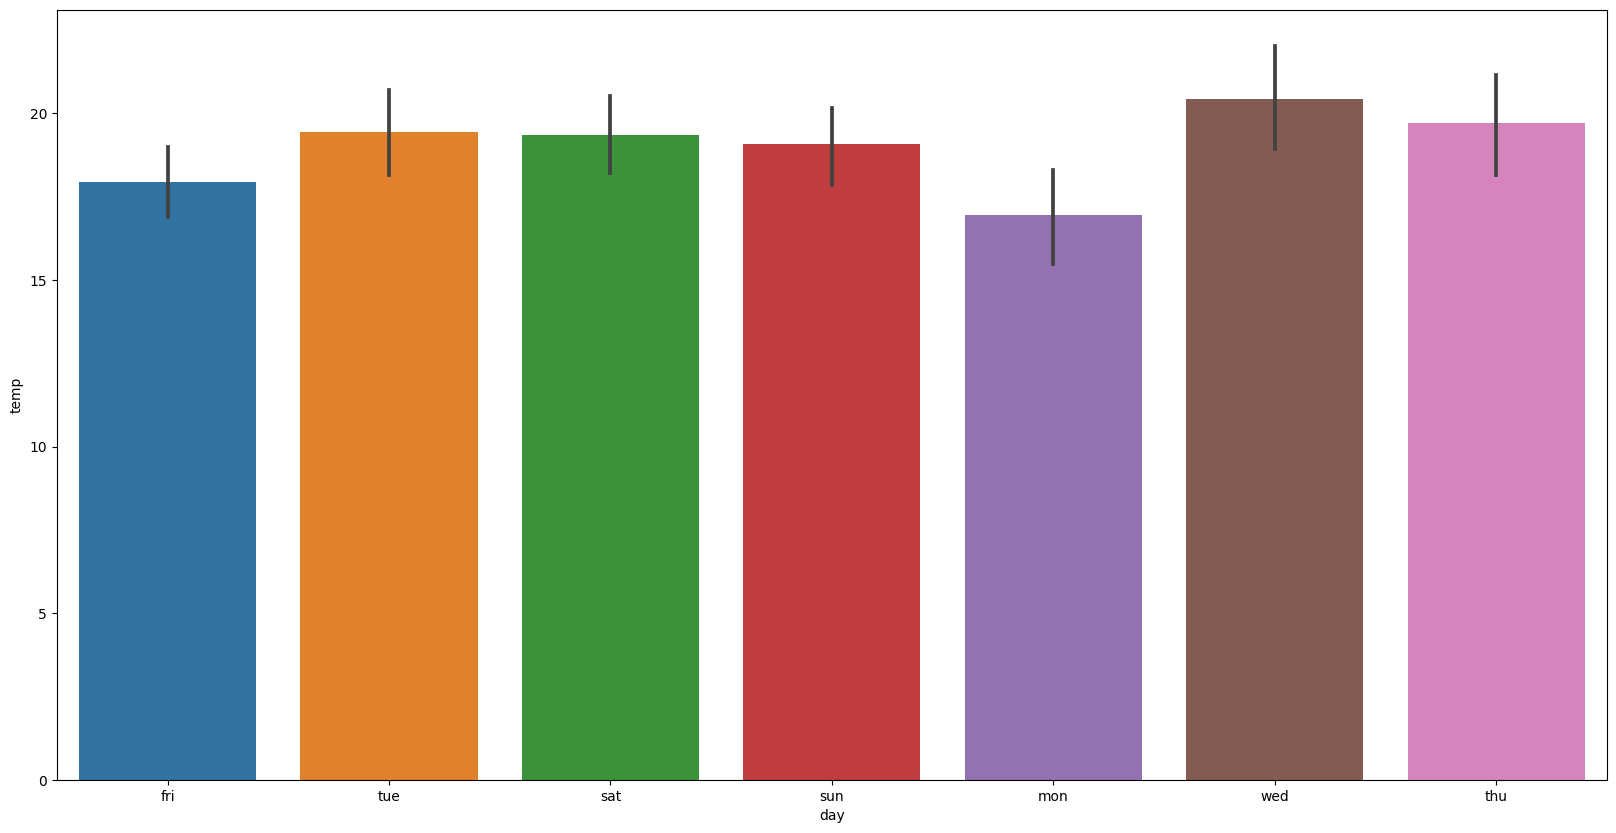

In [12]:
sns.barplot(data= df_forest, x='day', y='temp')

<Axes: xlabel='month', ylabel='DC'>

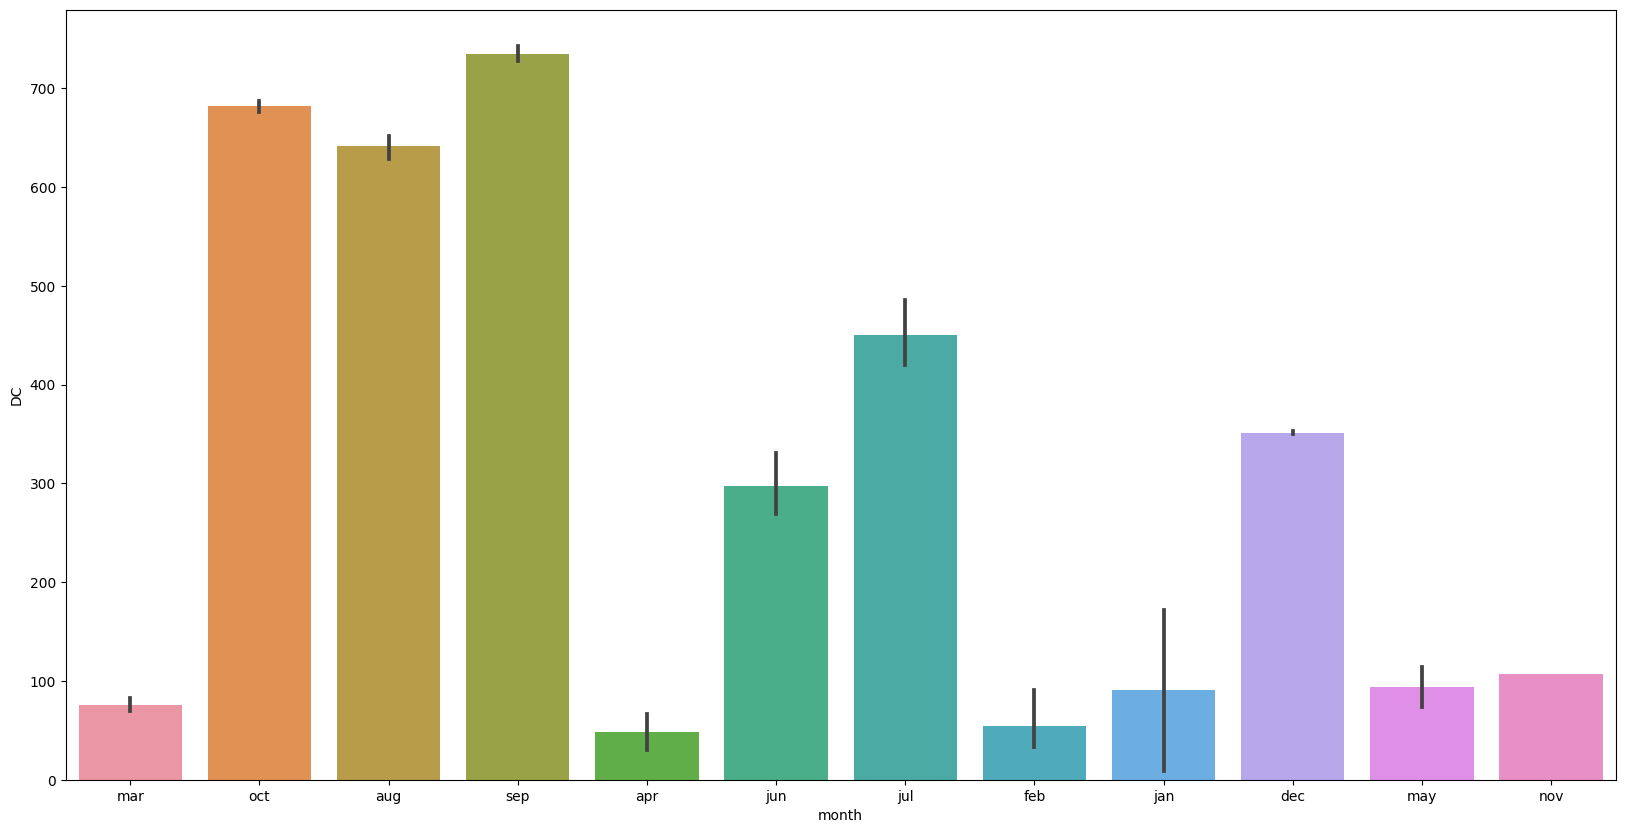

In [13]:
sns.barplot(data= df_forest, y='DC', x='month')

<Axes: xlabel='area'>

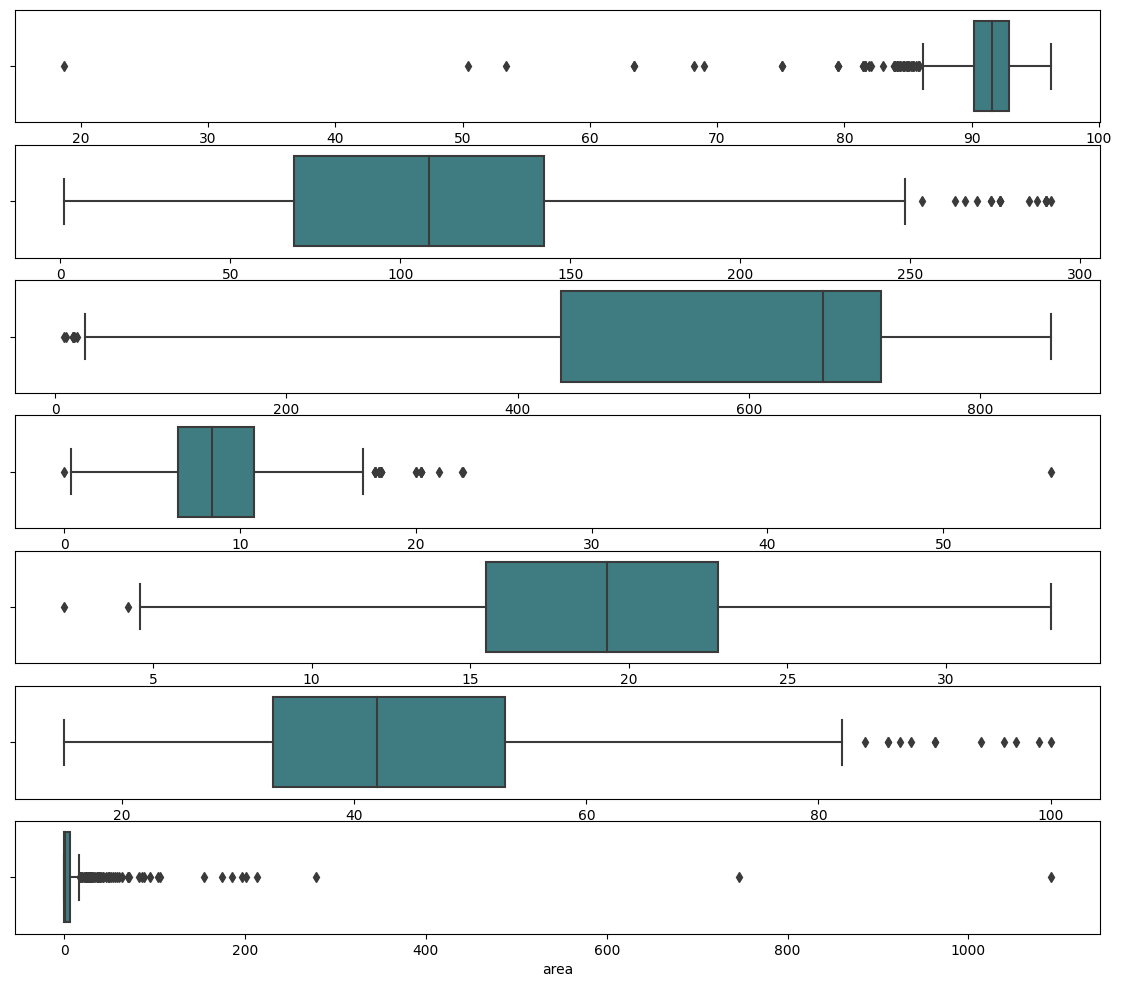

In [14]:
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=df_forest,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=df_forest,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=df_forest,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=df_forest,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=df_forest,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=df_forest,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=df_forest,palette='crest',ax=axes[6])

In [15]:
#Target variable
y_count = df_forest.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


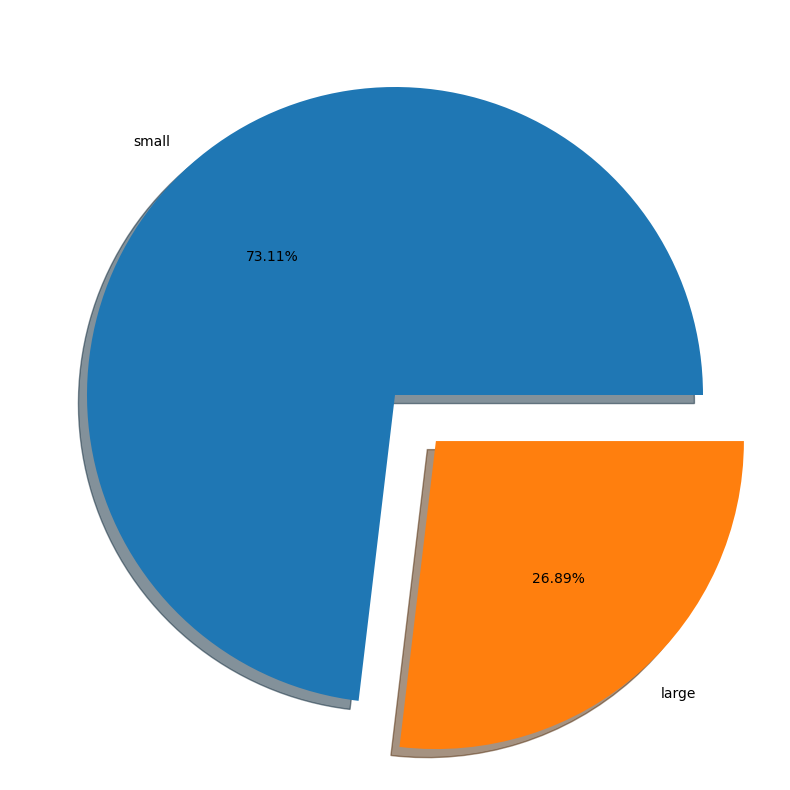

In [16]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1)
y_count

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_forest.iloc[:, -1] = labelencoder.fit_transform(df_forest.iloc[:,-1])
df_forest['size_category']                                                 #1 for small, 0 for large

<ipython-input-17-9b99898ca75d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_forest.iloc[:, -1] = labelencoder.fit_transform(df_forest.iloc[:,-1])


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [18]:
df_forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [19]:
df = df_forest.drop(['month','day'],axis=1)

In [20]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [21]:
corr = pd.DataFrame(data = df.corr().iloc[:,-1], index=df.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

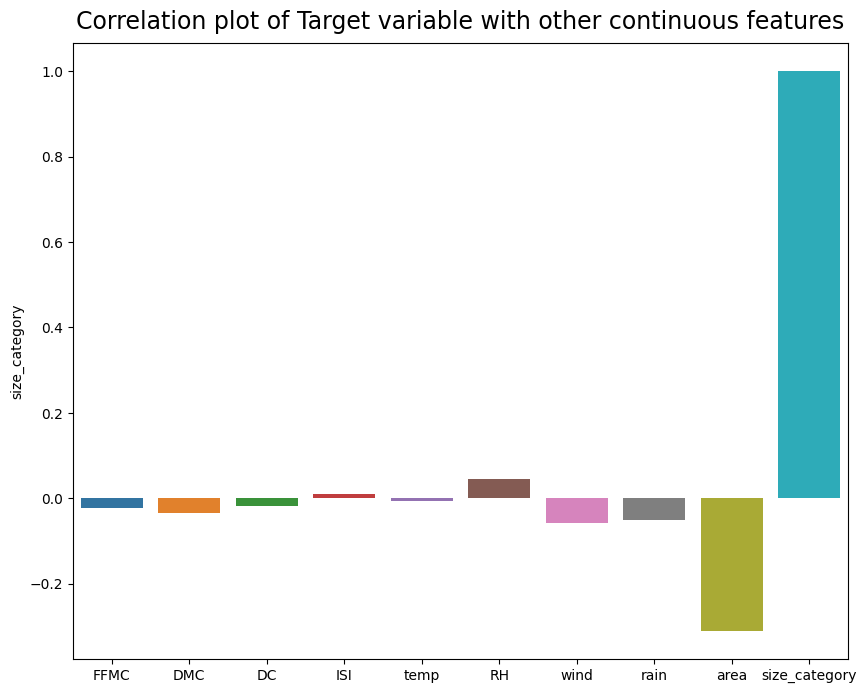

In [22]:
#Ploting correlation
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

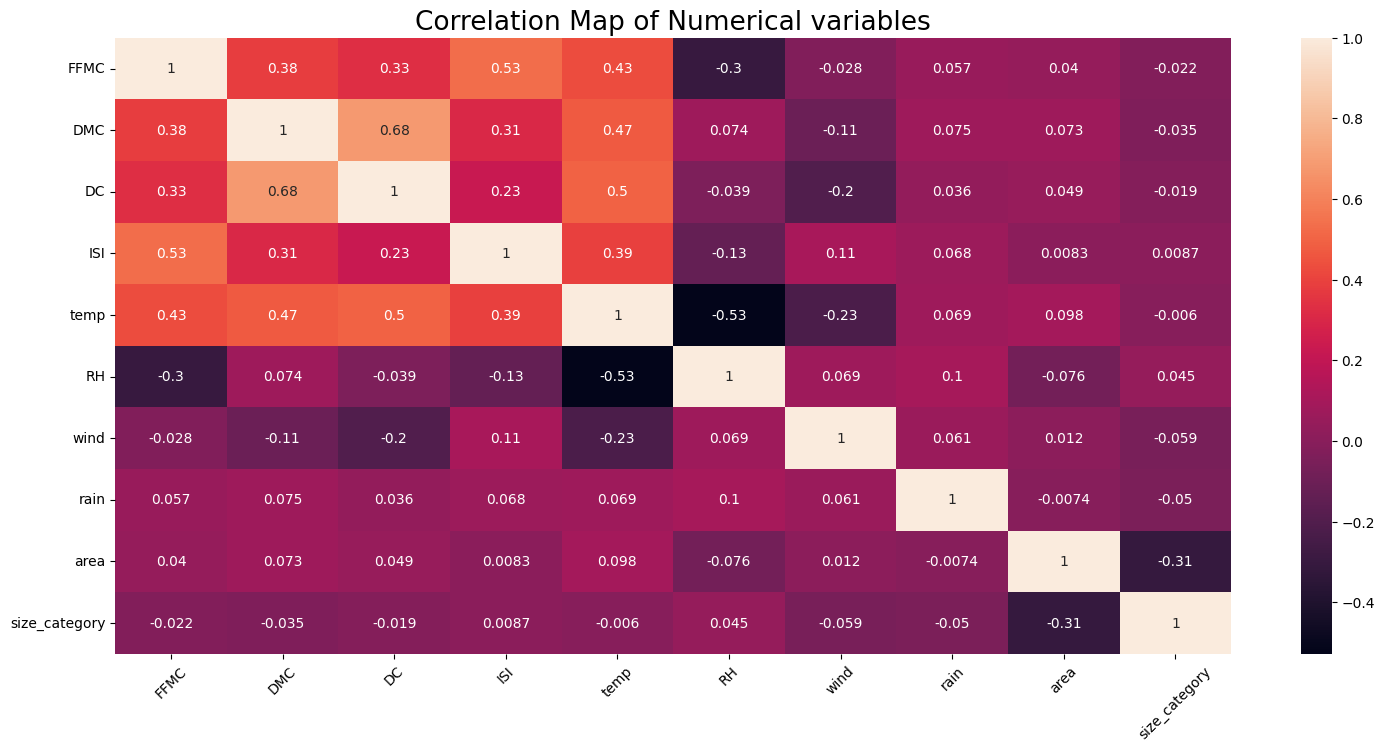

In [23]:
#Correlation map
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

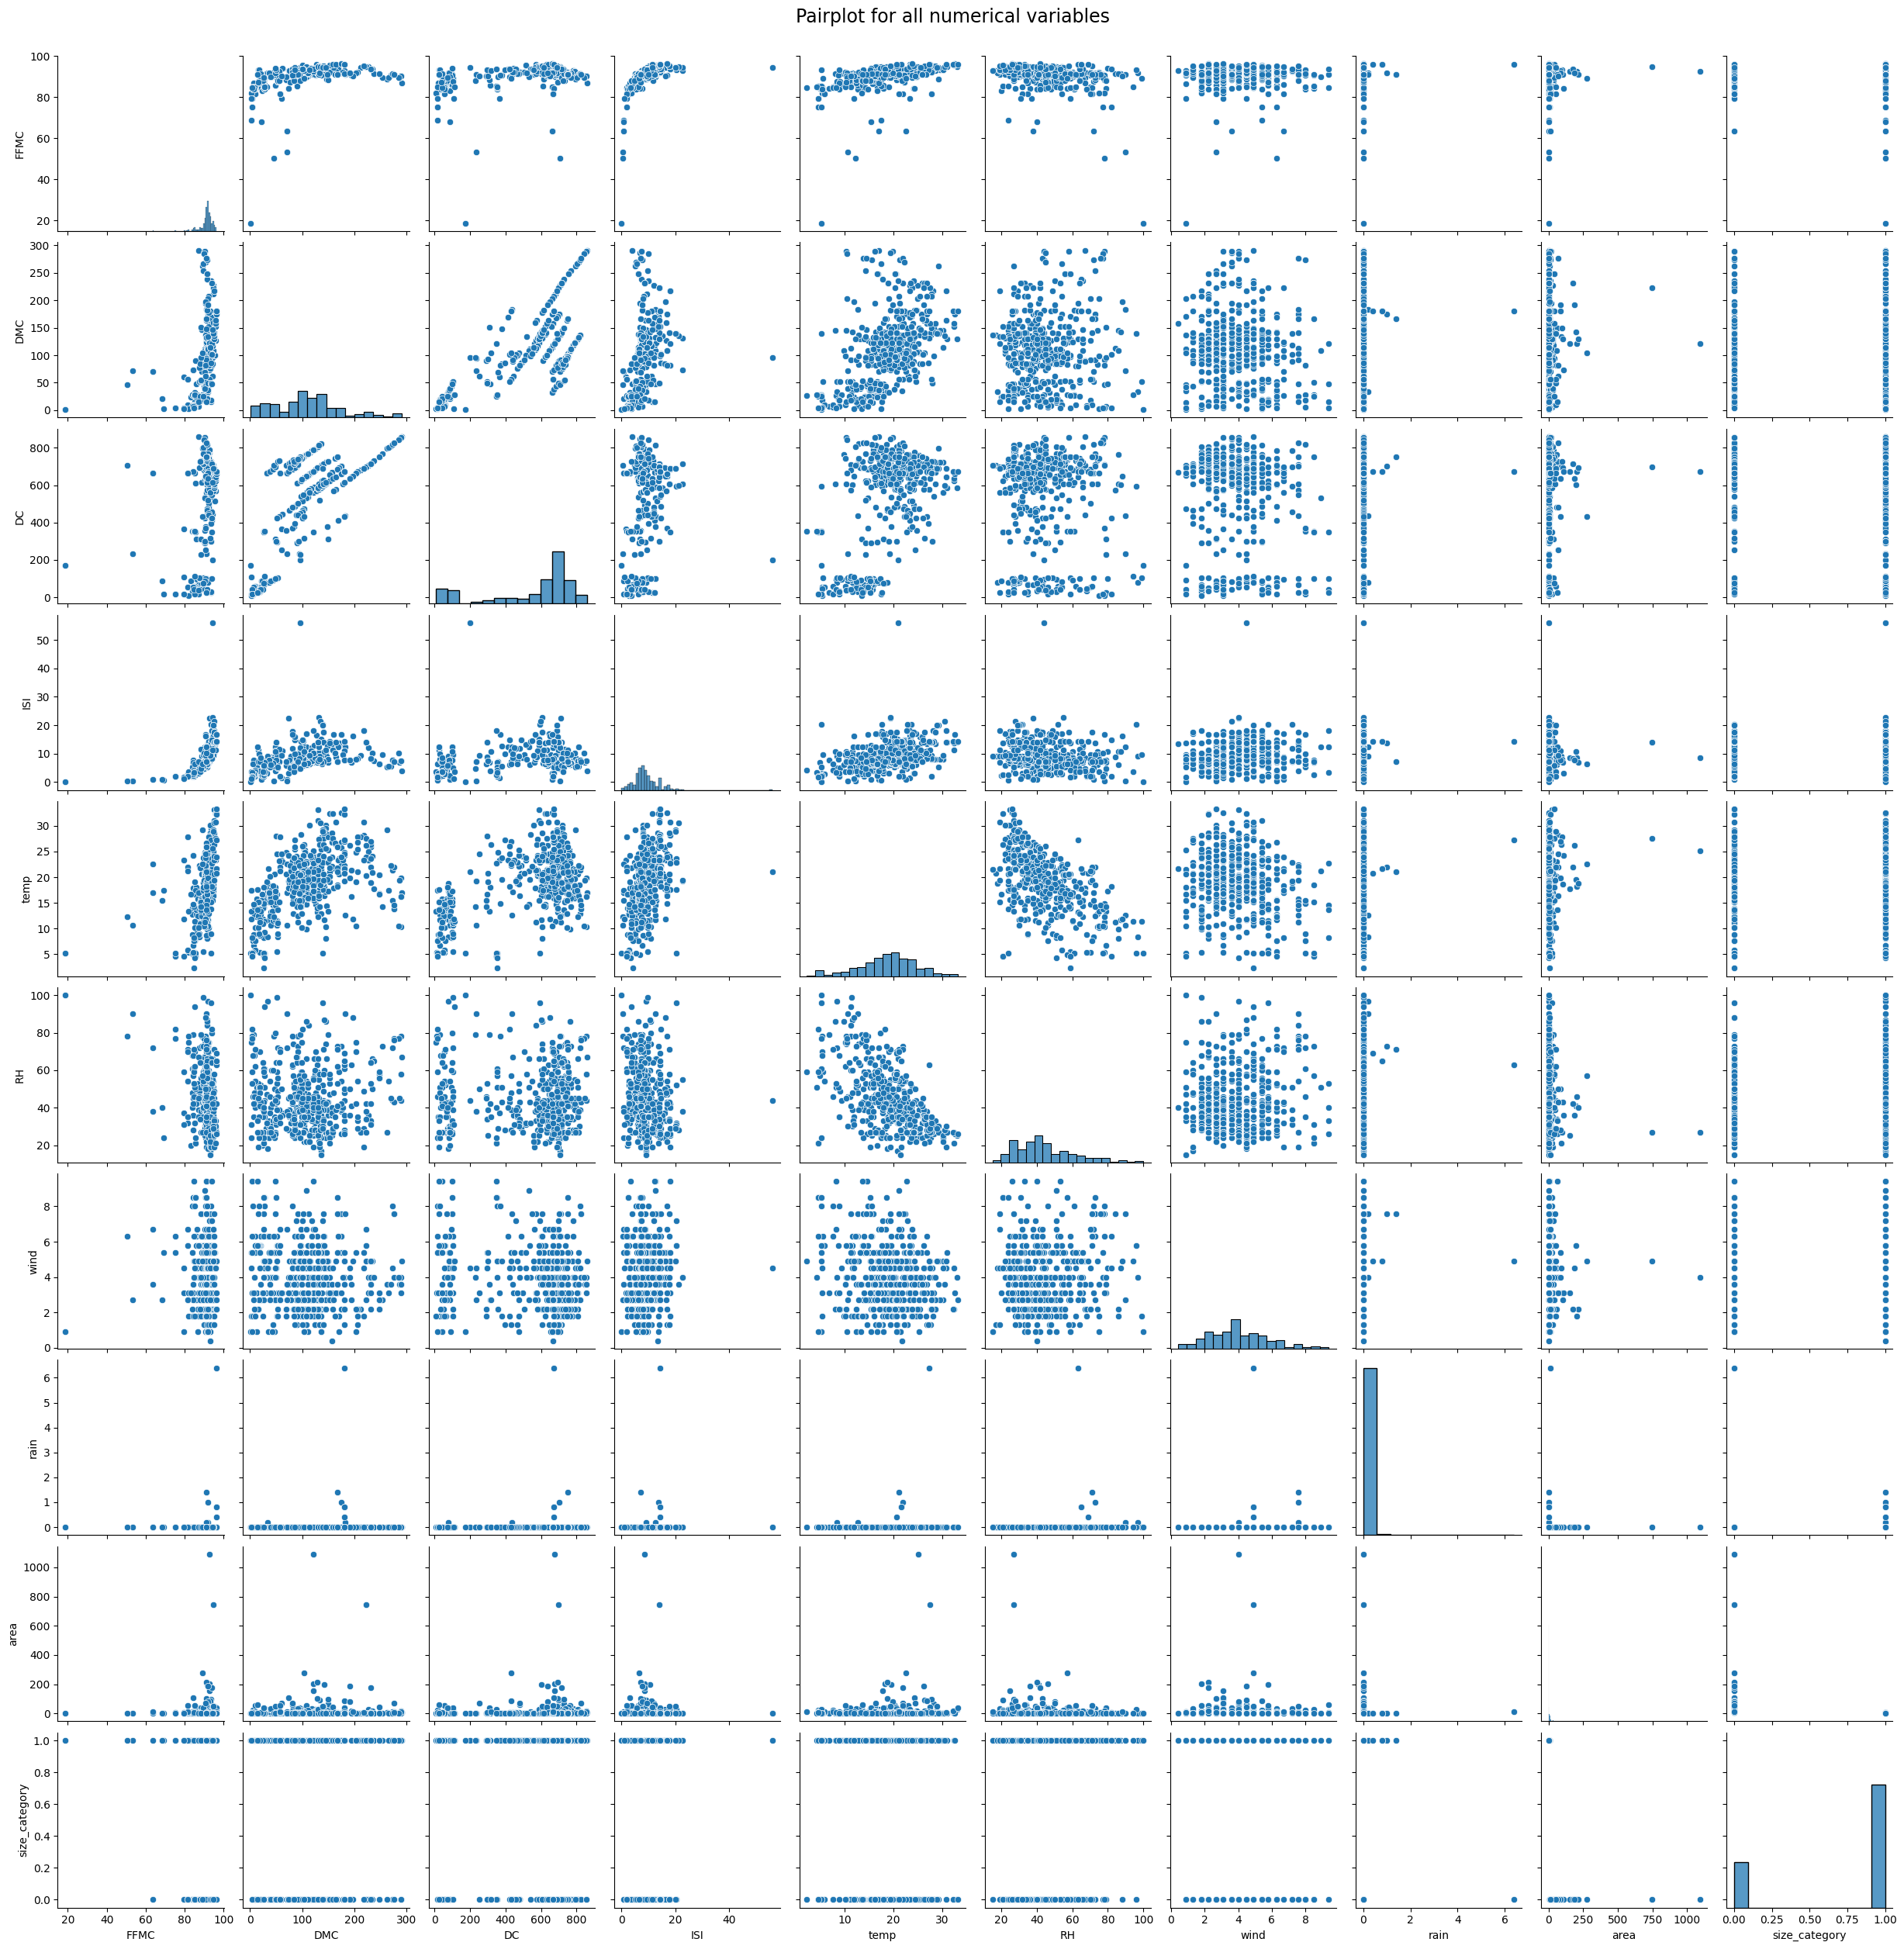

In [24]:
sns.pairplot(df)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

We can get insights from last row of the plots for our prediction model.

# Data Preprocessing

In [25]:
#drop the unnecessary columns
fire.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [26]:
pd.set_option("display.max_columns", 27)
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [27]:
fire.iloc[:, -1] = labelencoder.fit_transform(fire.iloc[:,-1])
fire['size_category']

<ipython-input-27-2c987ac6d2df>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  fire.iloc[:, -1] = labelencoder.fit_transform(fire.iloc[:,-1])


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [28]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=fire.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [30]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [31]:
df.shape

(517, 10)

# Splitting data into target variable and independent variables

In [32]:
x = df.drop('size_category', axis=1)
y = df['size_category']

# Converting independent features into normalised and standardized data

In [33]:
#Standardize & Normalize the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1

In [34]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


# Creating train and test data for model validation

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 9), (130, 9), (387,), (130,))

## Build a model

In [37]:
pip install keras

In [38]:
pip install tensorflow

In [39]:
pip install scikeras

In [40]:
# Importing the necessary packages
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [41]:
# create model

model = Sequential()
model.add(Dense(12, input_dim=9, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [42]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Fit the model
history  = model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
39/39 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.7080
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.7209
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.7209
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.7235
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.7261
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7390
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7442
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7674
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7804
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7984
Epoch 11/

In [44]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9923
accuracy: 99.23%


In [45]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy'])

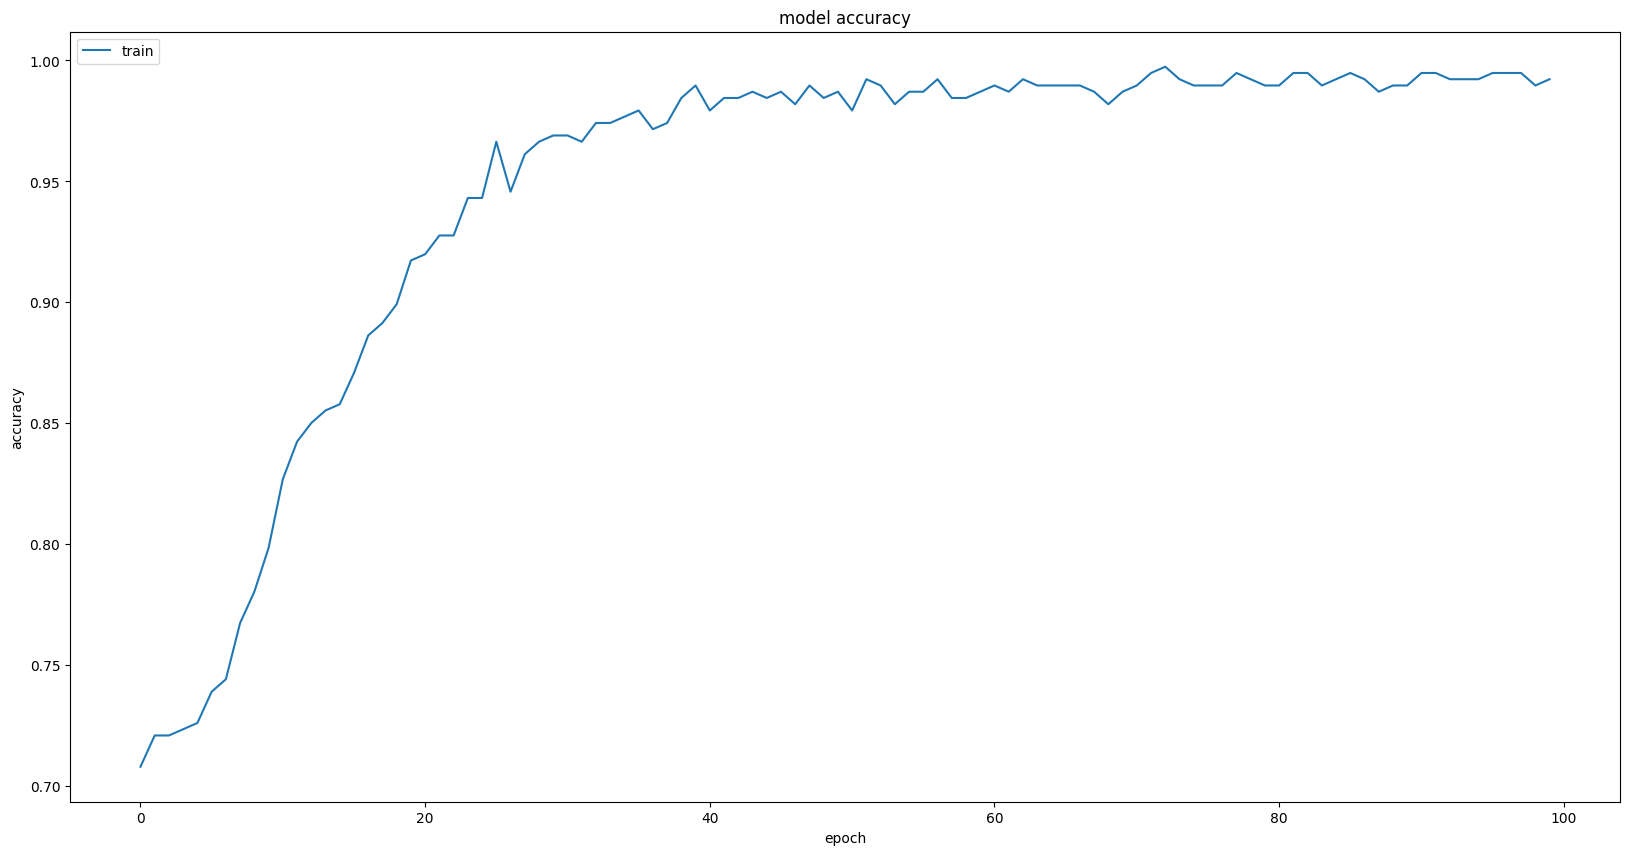

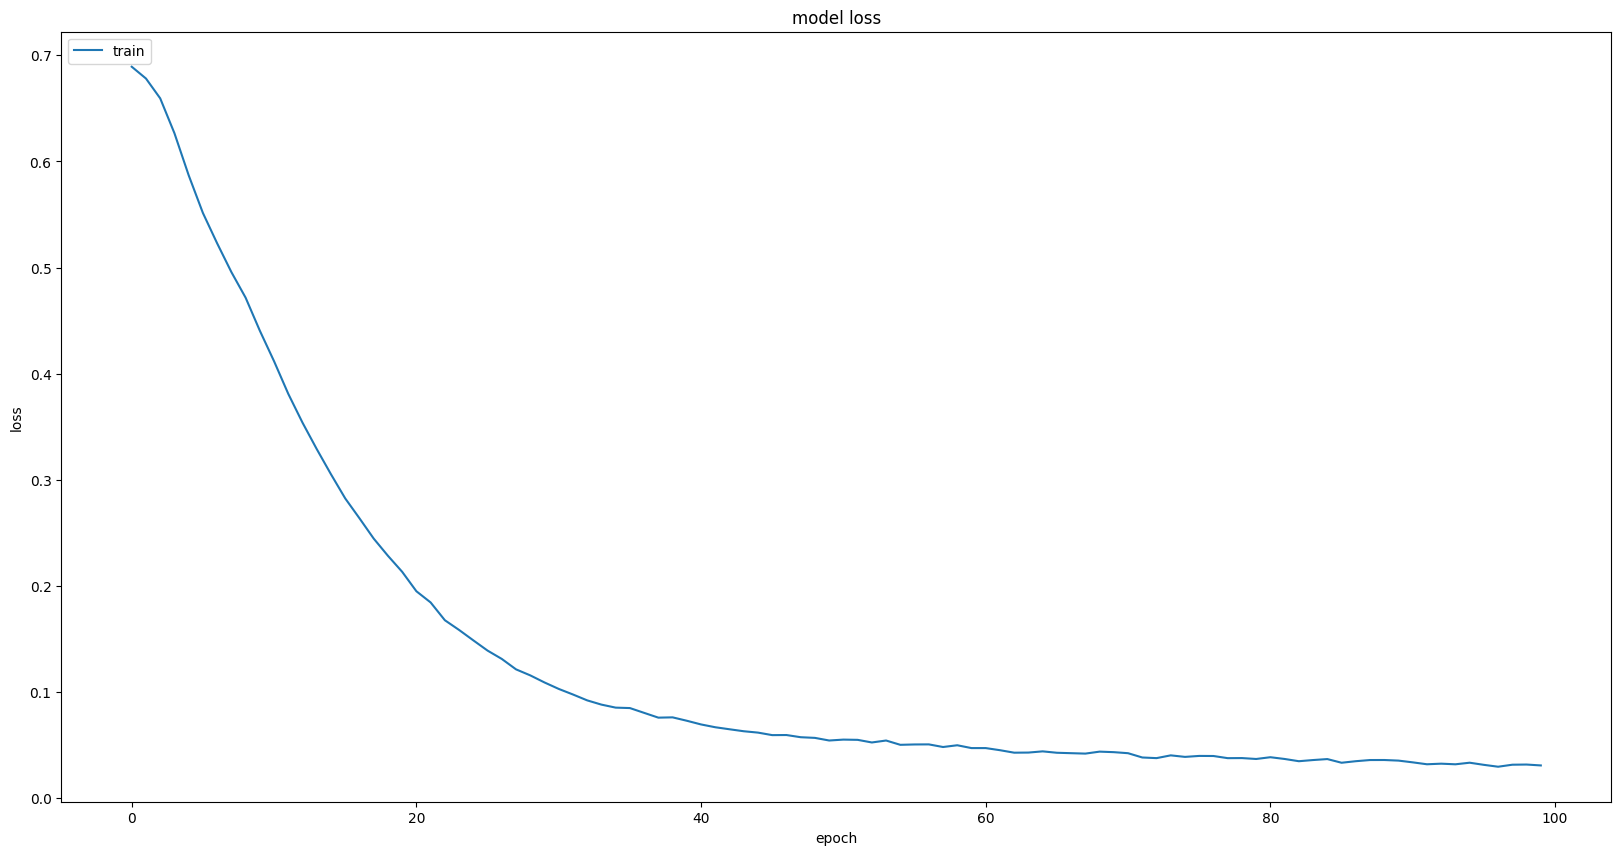

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()